# DNA and Protein

In [ ]:
table = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
    'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
}

In [ ]:
def read_seq(inputfile):
    """read and return the input input sequence"""
    dna_str = str()
    with open(inputfile,'r') as f:
        dna_str=f.read()
    dna_str = dna_str.replace("\n","").replace("\r","")
    return dna_str


def translate(dna_str):
    """Translate DNA string to protein"""
    table = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
    'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W',
    }
    protein = str()
    if len(dna_str)%3==0:
        for i in range(0,len(dna_str),3):
            codon = dna_str[i:i+3]
            protein +=table[codon]
            
    return protein

In [ ]:
dna = read_seq("NM_207618.2.txt")
prt = read_seq("NM_207618.2_CDS.txt")
translate(dna[20:938])[:-1],prt

# Language Processing

In [ ]:
from collections import Counter
def count_words(text):
    """
    count words in text!
    """
    text = text.lower()
    skips = [".", ",", ";", ":", "'", '"', "\n", "!", "?", "(", ")"]
    for ch in skips:
        text = text.replace(ch,"")
    word_counts = Counter(text.split(" "))            
    return word_counts

text ="Learn about how to use the Counter tool from the collections module to accomplish the same task"
count_words("This comprehension check is to check for comprehension.")

In [ ]:
def read_book(book_path):
    """
    read and return book content
    """
    with open(book_path,"r",encoding="utf8") as f:
        text = f.read()
        text = text.replace("\n","").replace("\r","")
        
    return text

In [ ]:
def word_stats(word_counts):
    """
    return nubmer of unique words and word frequencies
    """
    num_unique = len(word_counts)
    counts = word_counts.values()    
    return (num_unique,counts)

text = read_book("./Books/English/shakespeare/Romeo and Juliet.txt")
word_counts = count_words(text)
(num_unique,counts)=word_stats(word_counts)
num_unique,sum(counts)

In [ ]:
text = read_book("./Books/German/shakespeare/Romeo und Julia.txt")
word_counts = count_words(text)
(num_unique,counts)=word_stats(word_counts)
num_unique,sum(counts)

In [ ]:
import os
book_dir = "./Books"
import pandas as pd
df_books = pd.DataFrame(columns=("language","author","title","length","unique"))
title_num = 1

for language in os.listdir(book_dir):
    for author in os.listdir(book_dir+"/"+language):
        for title in os.listdir(book_dir+"/"+language+"/"+author):
            inputfile = book_dir+"/"+language+"/"+author+"/"+title
            text = read_book(inputfile)
            word_counts = count_words(text)
            (num_unique,counts)=word_stats(word_counts)
            df_books.loc[title_num] = language, author.capitalize(),title.replace(".txt",""),sum(counts),num_unique
            title_num +=1

In [ ]:
df_books.length

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_books.length,df_books.unique,"bo");
plt.loglog(df_books.length,df_books.unique,"bo");

In [ ]:
import matplotlib.colors as mcolors
import numpy as np

plt.figure(figsize=(10,10))

for language in df_books.language.unique():
    subset = df_books[df_books.language==language]
    plt.loglog(subset.length,subset.unique,"o",label=language, color=np.random.choice(list(mcolors.CSS4_COLORS)))
    
plt.legend()
plt.xlabel("Book length")
plt.ylabel("Number of unique words");

# Scotch Whisky

In [ ]:
import numpy as np
import pandas as pd
whisky = pd.read_csv("whiskies.txt")
whisky["Regions"] = pd.read_csv("regions.txt")
whisky

In [ ]:
# explore Pearson correlations between different feature
import matplotlib.pyplot as plt
flavors = whisky.iloc[:,2:14]
flavors_corr = flavors.corr(method='pearson')
plt.figure(figsize=(12,10))
plt.pcolor(flavors_corr,cmap=plt.get_cmap("jet"))
plt.colorbar();

In [ ]:
# explore Pearson correlations between different whiskies
import seaborn as sns
flavors = whisky.iloc[:,2:14]
whisky_corr = flavors.transpose().corr(method='pearson')
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(whisky_corr);

In [ ]:
from sklearn.cluster import SpectralCoclustering

model = SpectralCoclustering(n_clusters=6,random_state=0)
model.fit(whisky_corr)
print(np.sum(model.rows_,axis=1))
print(np.sum(model.rows_,axis=0))
print(model.row_labels_)

In [ ]:
whisky['Group'] = pd.Series(model.row_labels_,index=whisky.index)
whisky_grouped = whisky.iloc[np.argsort(model.row_labels_)]
whisky_grouped = whisky_grouped.reset_index(drop=True)
whisky_grouped_corr = whisky_grouped.iloc[:,2:14].transpose().corr(method='pearson')

In [ ]:
whisky_grouped

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.pcolor(whisky_corr,cmap=plt.get_cmap("jet"))
plt.title("Original")
plt.axis("tight")

plt.subplot(122)
plt.pcolor(whisky_grouped_corr,cmap=plt.get_cmap("jet"))
plt.title("Grouped")
plt.axis("tight");

# GPS Tracking of Birds

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
bird_data = pd.read_csv("bird_tracking.csv",index_col=0)

bird_names = pd.unique(bird_data.bird_name)
plt.figure(figsize=(7,7))
for bird_name in bird_names:
    idx = bird_data.bird_name==bird_name
    x,y = bird_data.longitude[idx],bird_data.latitude[idx]
    plt.plot(x,y,".", label=bird_name);
    
plt.xlabel("longitude")
plt.xlabel("latitude")
plt.legend(loc="lower right");

In [ ]:
idx = bird_data.bird_name=="Eric"
speed = bird_data.speed_2d[idx]
idx_nan = np.isnan(speed)
plt.figure(figsize=(10,7))
plt.hist(speed[~idx_nan],bins=np.linspace(0,30,20), density=True)
plt.xlabel("2D speed (m/s)")
plt.ylabel("Frequency");

In [ ]:
import datetime

bird_data["timestamp"]=bird_data.date_time.apply(lambda x: datetime.datetime.strptime(x[:-3],"%Y-%m-%d %H:%M:%S"))
times = bird_data.timestamp[bird_data.bird_name=="Eric"]
elapsed_times= list(times.map(lambda x: (x-times[0])))

plt.figure(figsize=(7,7))
plt.plot(np.array(elapsed_times)/datetime.timedelta(days=1))
plt.xlabel("Observation")
plt.ylabel("Elapsed time (days)")
plt.tight_layout();

In [ ]:
elapsed_days = np.array(elapsed_times)/datetime.timedelta(days=1)
next_day = 1
idxs = []
daily_mean_speed = []
for i, t in enumerate(elapsed_days):
    if t<next_day:
        idxs.append(i)
    else:
        daily_mean_speed.append(np.mean(bird_data.speed_2d[idxs]))
        next_day +=1
        idxs=[]

plt.figure(figsize = (8,6))
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean speed (m/s)")
plt.tight_layout();

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
bird_names = pd.unique(bird_data.bird_name)

proj = ccrs.Mercator()
plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0,20.0,52.0,10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

for bird_name in bird_names:
    idx = bird_data.bird_name==bird_name
    x,y = bird_data.longitude[idx],bird_data.latitude[idx]
    plt.plot(x,y,".", transform=ccrs.Geodetic(),label=bird_name);
plt.legend(loc="upper left");    

# Network Analysis
Network: many components

components: nodes/vertices, links/edges

concepts: neighbor, degree, path, component, and largest connected component

In [50]:
import networkx as nx

G = nx.Graph()
G.add_node(1)
G.add_nodes_from([2, 3,'w','v'])
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

G.add_edge(1,2)
G.add_edges_from([(1,3),(1,4),('w','v')])
print(G.number_of_nodes(),G.number_of_edges())

7 4


1 17
34 78


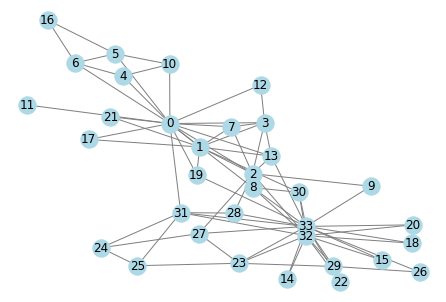

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.karate_club_graph()
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray")
# plt.savefig("katate_graph.pdf")
print(G.degree()[11],G.degree(33))
print(G.number_of_nodes(),G.number_of_edges())

## Random Graphs

In [7]:
# manual
from scipy.stats import bernoulli
import networkx as nx

bernoulli.rvs(p=0.2)

def er_graph(N,p):
    """Generate an ER Graph"""
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for node1 in G.nodes():
        for node2 in G.nodes():
            if node1 < node2 and bernoulli.rvs(p=p) == True:
                G.add_edge(node1,node2)
    return G

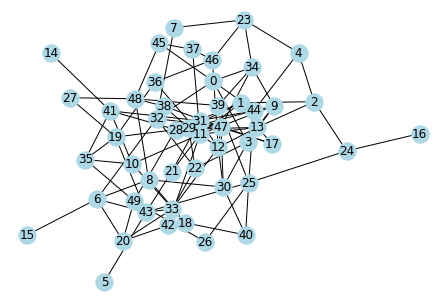

In [8]:
nx.draw(er_graph(50,0.08),with_labels=True,node_color="lightblue");

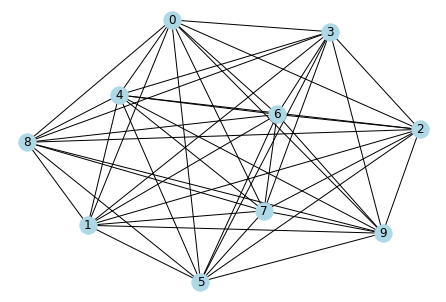

In [9]:
# lib
import networkx as nx
G = nx.erdos_renyi_graph(n=10,p=1)
nx.draw(G,with_labels=True,node_color="lightblue");

## Degree Distribution

In [39]:
import networkx as nx
def plot_degree_distribution(G):
    degree_sequence = [d for n, d in G.degree()]
    plt.hist(degree_sequence, histtype="step")
    plt.xlabel("Degree $k$")
    plt.ylabel("$P(k)$")
    plt.title("Degree distribution")
    
def basic_net_stats(G):
    print(f"number of nodes: {G.number_of_nodes():d}")
    print(f"number of edges: {G.number_of_edges():d}")
    degree_sequence = [d for n, d in G.degree()]
    print(f"Average degree: {np.mean(degree_sequence):.2f}")
    
def get_largest_connected_component(G):
    gen = nx.connected_components(G)
    nums = [G.subgraph(g).number_of_nodes() for g in gen]
    return max(nums)    

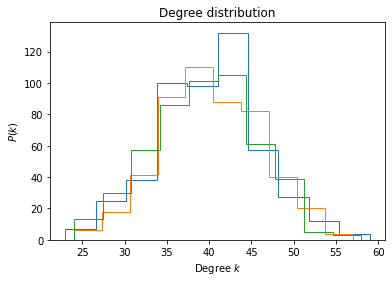

In [13]:
G1 = er_graph(500,0.08)
G2 = er_graph(500,0.08)
G3 = er_graph(500,0.08)

plot_degree_distribution(G1)
plot_degree_distribution(G2)
plot_degree_distribution(G3)

number of nodes: 843
number of edges: 3405
Average degree: 8.08
number of nodes: 877
number of edges: 3063
Average degree: 6.99


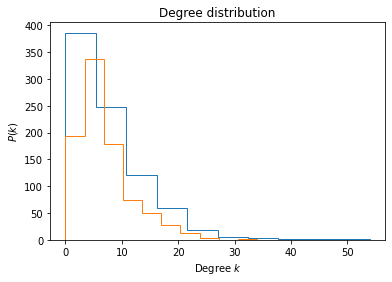

In [26]:
import numpy as np
import networkx as nx
A1 = np.loadtxt("adj_allVillageRelationships_vilno_1.csv",delimiter=",")
A2 = np.loadtxt("adj_allVillageRelationships_vilno_2.csv",delimiter=",")

G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)

basic_net_stats(G1)
basic_net_stats(G2)
plot_degree_distribution(G1)
plot_degree_distribution(G2)

In [49]:
get_largest_connected_component(G2)/G2.number_of_nodes() *100

92.36031927023946